In [1]:
#alphavantage documentation available at:
#https://www.alphavantage.co/documentation/

%matplotlib inline
import stocks
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import csv
import time
import random


In [2]:
symbols = pd.read_csv("Resources/companies.csv")

In [3]:
symbols.head()

,Symbol,Name,Sector,Industry,Exchange
0,DDD,3D Systems Corporation,Technology,Computer Software: Prepackaged Software,nyse
1,MMM,3M Company,Health Care,Medical/Dental Instruments,nyse
2,WBAI,500.com Limited,Consumer Services,Services-Misc. Amusement & Recreation,nyse
3,WUBA,58.com Inc.,Technology,"Computer Software: Programming, Data Processing",nyse
4,EGHT,8x8 Inc,Technology,EDP Services,nyse


In [4]:
try:
    dat = pd.read_csv("Data/stock_history.csv")
    dat['date'] = dat['date'].astype('datetime64[ns]')
    tickers = []
    for col in dat.columns:
        if "Unnamed" in col:
            dat.drop(columns=col, inplace=True)
        elif col != "date" and col != "type":
            tickers.append(col)
    completed_companies = pd.read_csv("Data/companies_comp.csv")
except:
    dat = None
    tickers=[]

In [5]:
k = 1
companies = pd.read_csv("Resources/companies.csv")
for row in symbols.itertuples():
    if k > 400:
        break
    if row.Symbol in dat.columns or '-' in row.Symbol:
        continue
    time.sleep(15)
    print(row.Symbol)
    try:
        temp = stocks.get_pd(func='time series daily', symbol=row.Symbol, outputsize='full')
        temp = stocks.finance_series(temp, title=row.Symbol)
        k += 1
        print(len(temp))
        if len(temp) < 1000:
            continue
        if dat is None:
            dat = temp
            tickers.append(row.Symbol)
        else:
            dat = pd.merge(dat, temp, how='outer', on=['date', 'type'])
            tickers.append(row.Symbol)
        if not k % 10:
            dat.to_csv("Data/stock_history.csv")
            completed_companies = companies.loc[companies["Symbol"].apply(lambda x: x in tickers), :]
            completed_companies.set_index("Symbol").to_csv("Data/companies_comp.csv")
            print("**********\nSAVING\n**********")
    except:
        None

dat.to_csv('Data/stock_history.csv')
completed_companies = companies.loc[companies["Symbol"].apply(lambda x: x in tickers), :]
completed_companies.set_index("Symbol").to_csv("Data/companies_comp.csv")

DDD
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=DDD&outputsize=full&apikey=CGL3TP0975MA8R2V
25160
MMM
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MMM&outputsize=full&apikey=CGL3TP0975MA8R2V
25160
WBAI
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=WBAI&outputsize=full&apikey=CGL3TP0975MA8R2V
7225
WUBA
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=WUBA&outputsize=full&apikey=CGL3TP0975MA8R2V
7305
EGHT
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=EGHT&outputsize=full&apikey=CGL3TP0975MA8R2V
25160
JEQ
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=JEQ&outputsize=full&apikey=CGL3TP0975MA8R2V
25160
GOLF
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=GOLF&outputsize=full&apikey=CGL3TP0975MA8R2V
3535
PEO
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=PEO&outputsize=full&apikey=CGL3TP0975MA8R2V
25160
WMS
https://www.alp

KeyboardInterrupt: 

In [66]:
dat.to_csv("Data/stock_history.csv")

In [6]:
dat.head()

,date,A,type,AA,AAC,AAN,AAP,AAT,AB,ABB,...,CBH,NCV,NCZ,NIE,NFJ,MO,COLD,PLAN,FINS,BUD
0,2019-08-20,71.12,close,18.31,0.650,63.30,135.38,46.90,27.50,18.49,...,9.25,5.67,5.02,21.64,12.14,46.03,36.04,57.81,20.510,94.95
1,2019-08-19,71.75,close,18.23,0.650,64.38,136.35,47.28,27.36,18.63,...,9.25,5.60,4.99,21.56,12.18,46.70,36.30,57.65,20.350,95.92
2,2019-08-16,71.08,close,17.52,0.600,64.36,136.59,47.06,27.03,18.47,...,9.23,5.59,4.93,21.36,12.09,46.48,35.93,58.03,20.200,95.29
3,2019-08-15,69.59,close,16.92,0.619,62.50,137.50,46.44,26.38,18.25,...,9.20,5.56,4.87,21.17,11.94,45.49,35.40,55.52,20.000,93.63
4,2019-08-14,65.59,close,17.50,0.670,63.85,136.49,46.43,26.51,18.28,...,9.16,5.48,4.88,21.19,11.95,45.87,34.99,55.31,20.086,93.36


In [12]:
dat_gdf = dat.groupby(by="type")

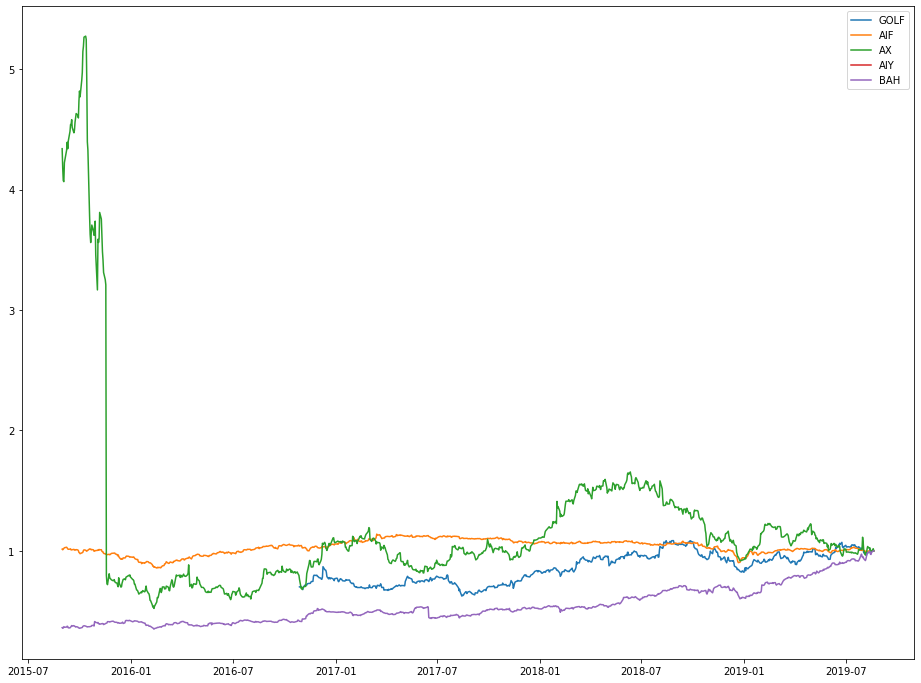

In [15]:
temp_h = dat_gdf.get_group("high")
plt.figure(figsize=(16,12))
for col in random.sample(tickers, 5):
    plt.plot(temp_h["date"].iloc[0:1000], temp_h[col].iloc[0:1000]/temp_h[col].iloc[0], label=col)

plt.legend()

In [13]:
completed_companies.set_index("Symbol", inplace=True)


In [20]:
completed_companies.groupby(by='Sector')["Name"].count()

Sector
Basic Industries         18
Capital Goods            17
Consumer Durables        16
Consumer Non-Durables    12
Consumer Services        46
Energy                    6
Finance                  42
Health Care              12
Miscellaneous             4
Public Utilities         18
Technology               21
Transportation            5
Name: Name, dtype: int64

In [5]:
x = list(completed_companies.groupby('Sector').get_group('Basic Industries').groupby('Industry').get_group('Precious Metals')['Symbol'])

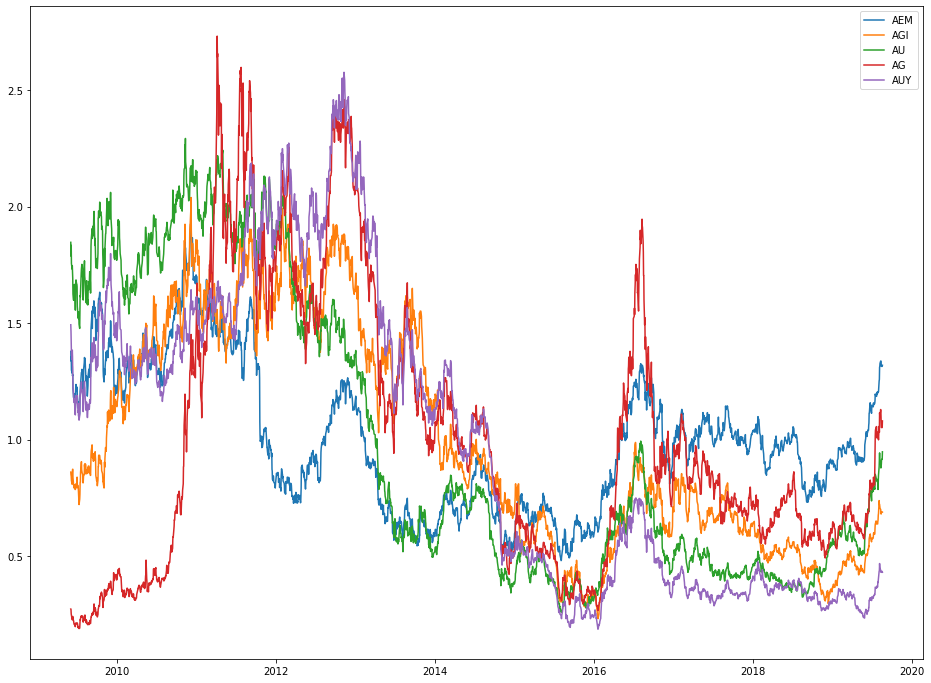

In [27]:
plt.figure(figsize=(16,12))
stocks.plot(dat.loc[dat['date'] > '2009-06',:], symbols=x, type='high', normalize=True)
plt.legend()

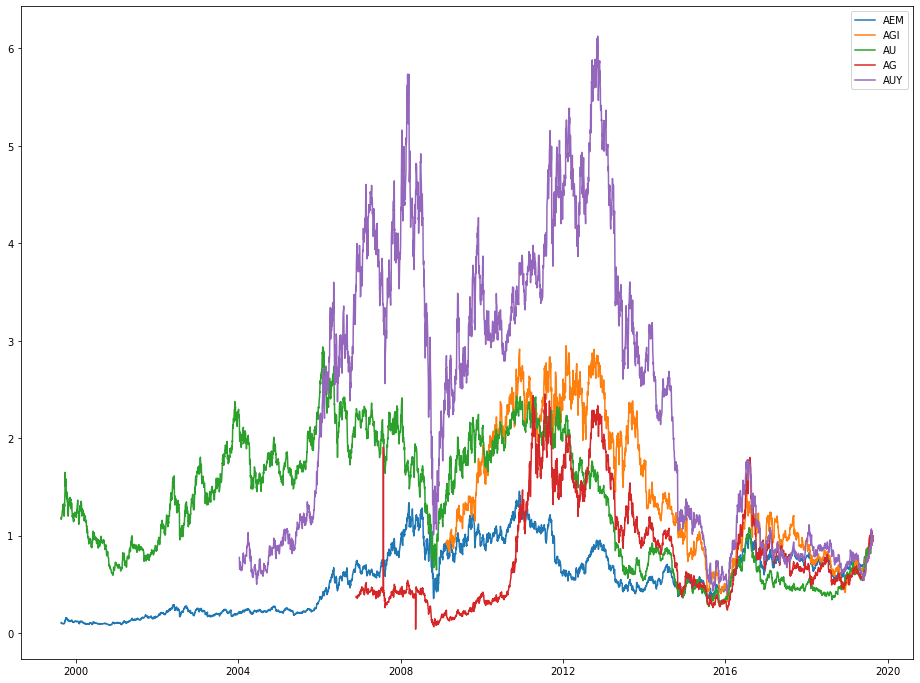

In [17]:
plt.figure(figsize=(16,12))
stocks.plot(dat, symbols=x, type='low', normalize=True)
plt.legend()

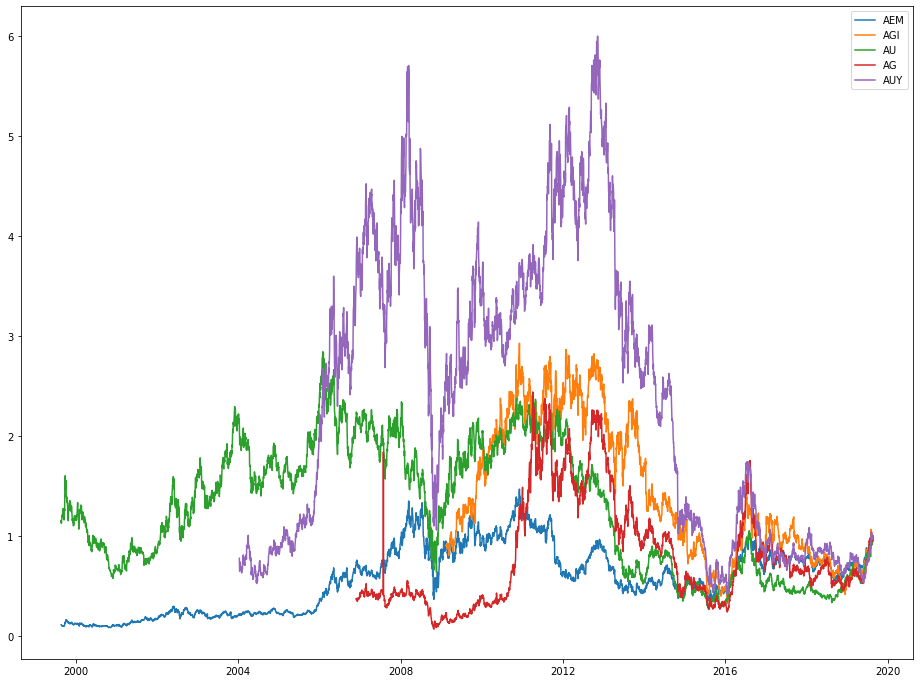

In [18]:
plt.figure(figsize=(16,12))
stocks.plot(dat, symbols=x, type='close', normalize=True)
plt.legend()